In [1264]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1265]:
#loading the data set
car=pd.read_csv('/content/used_car_dataset.csv')

### **EDA**

In [1266]:
car.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [1267]:
car.shape

(2105, 6)

In [1268]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


### **Pre-processing**

In [1269]:
car['year_of_manufacture'].unique()

array([2016, 2019, 2021, 2017, 2013, 2018, 2007, 2022, 2014, 2020, 2015,
       2009, 2011, 2010, 2012, 2008, 2006, 2004, 2005])

In [1270]:
car['year_of_manufacture'].value_counts()

2018    358
2017    297
2019    249
2016    217
2015    204
2020    180
2021    169
2014    145
2013     97
2022     55
2012     55
2011     33
2010     20
2009     11
2007      6
2008      6
2006      1
2004      1
2005      1
Name: year_of_manufacture, dtype: int64

In [1271]:
car['car_price_in_rupees'].unique()

array(['₹ 4.45 Lakh', '₹ 2.93 Lakh', '₹ 22.49 Lakh', '₹ 6.95 Lakh',
       '₹ 12 Lakh', '₹ 3.72 Lakh', '₹ 11.5 Lakh', '₹ 10.39 Lakh',
       '₹ 3.75 Lakh', '₹ 4.25 Lakh', '₹ 6.75 Lakh', '₹ 4.49 Lakh',
       '₹ 3 Lakh', '₹ 9.5 Lakh', '₹ 13.25 Lakh', '₹ 9.25 Lakh',
       '₹ 95 Lakh', '₹ 8.71 Lakh', '₹ 3.35 Lakh', '₹ 9.88 Lakh',
       '₹ 1.15 Crore', '₹ 11 Lakh', '₹ 9.9 Lakh', '₹ 3.45 Lakh',
       '₹ 37.49 Lakh', '₹ 6.39 Lakh', '₹ 8.9 Lakh', '₹ 6.59 Lakh',
       '₹ 3.92 Lakh', '₹ 8 Lakh', '₹ 7.75 Lakh', '₹ 11.52 Lakh',
       '₹ 16.75 Lakh', '₹ 8.5 Lakh', '₹ 5.93 Lakh', '₹ 4.15 Lakh',
       '₹ 18.5 Lakh', '₹ 2.4 Lakh', '₹ 11.99 Lakh', '₹ 8.95 Lakh',
       '₹ 9.68 Lakh', '₹ 81 Lakh', '₹ 4.93 Lakh', '₹ 10.5 Lakh',
       '₹ 7.85 Lakh', '₹ 38.99 Lakh', '₹ 31 Lakh', '₹ 4.85 Lakh',
       '₹ 4.35 Lakh', '₹ 4.51 Lakh', '₹ 5.45 Lakh', '₹ 4.5 Lakh',
       '₹ 6.81 Lakh', '₹ 3.95 Lakh', '₹ 11.43 Lakh', '₹ 23 Lakh',
       '₹ 12.75 Lakh', '₹ 5.99 Lakh', '₹ 16.2 Lakh', '₹ 4.2 Lakh',
       '₹

In [1272]:
car['car_price_in_rupees']=car['car_price_in_rupees'].str.replace('Lakh','')

car['car_price_in_rupees']=car['car_price_in_rupees'].str.replace('Crore','')

car['car_price_in_rupees']=car['car_price_in_rupees'].str.replace(',','')

In [1273]:
car['car_price_in_rupees']=car['car_price_in_rupees'].str.replace('₹','')

In [1274]:
car['car_price_in_rupees'] = car['car_price_in_rupees'] .str.replace(' Lakh*', '').astype(float)

car['car_price_in_rupees'] *= 100000

In [1275]:
car['car_price_in_rupees'].head()

0     445000.0
1     293000.0
2    2249000.0
3     695000.0
4    1200000.0
Name: car_price_in_rupees, dtype: float64

In [1276]:
car['car_price_in_rupees'].astype(int)

0        445000
1        293000
2       2249000
3        695000
4       1200000
         ...   
2100     360000
2101    2200000
2102     838000
2103     675000
2104     876000
Name: car_price_in_rupees, Length: 2105, dtype: int64

In [1277]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2105 non-null   object 
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 98.8+ KB


In [1278]:
car['kms_driven'].unique()

array(['22,402 km', '10,344 km', '12,999 km', ..., '37,622 km',
       '64,726 km', '29,150 km'], dtype=object)

In [1279]:
car['kms_driven'].value_counts()

45,000 km    17
65,000 km    12
75,000 km    12
52,000 km    11
25,000 km    10
             ..
77,050 km     1
11,363 km     1
29,192 km     1
82,899 km     1
29,150 km     1
Name: kms_driven, Length: 1628, dtype: int64

In [1280]:
car['kms_driven']=car['kms_driven'].str.replace('km','')

In [1281]:
car['kms_driven']=car['kms_driven'].str.replace(',','')

In [1282]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [1283]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2105 non-null   int64  
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 98.8+ KB


In [1284]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [1285]:
car['fuel_type'].value_counts()

Petrol        1348
Diesel         636
CNG             82
Petrol + 1      18
Electric        10
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64

In [1286]:
#null values
car.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [1287]:
#duplicates
car.duplicated().sum()

92

In [1288]:
car.drop_duplicates(inplace=True)

In [1289]:
car.duplicated().sum()

0

In [1290]:
car.shape

(2013, 6)

In [1291]:
car['car_name']=car['car_name'].str.split().str.slice(start=0,stop=1).str.join(' ')

In [1292]:
car=car.reset_index(drop=True)

## Cleaned Data

In [1293]:
car

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,445000.0,22402,Petrol,Mumbai,2016
1,Maruti,293000.0,10344,Petrol,Kolkata,2019
2,Tata,2249000.0,12999,Diesel,Bangalore,2021
3,Maruti,695000.0,45000,Petrol,Thane,2016
4,Jeep,1200000.0,11193,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2008,Ford,360000.0,42158,Diesel,Kolkata,2015
2009,MINI,2200000.0,68862,Diesel,Hyderabad,2013
2010,Hyundai,838000.0,37622,Petrol,Chennai,2018
2011,Maruti,675000.0,64726,Petrol,Mumbai,2017


In [1294]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   car_price_in_rupees  2013 non-null   float64
 2   kms_driven           2013 non-null   int64  
 3   fuel_type            2013 non-null   object 
 4   city                 2013 non-null   object 
 5   year_of_manufacture  2013 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 94.5+ KB


In [1295]:
car.describe()

,car_price_in_rupees,kms_driven,year_of_manufacture
count,2.013000e+03,2.013000e+03,2013.000000
mean,9.051722e+06,4.843062e+04,2017.023845
std,2.598195e+08,8.542756e+04,2.823402
min,1.100000e+05,6.400000e+01,2004.000000
25%,4.750000e+05,2.500000e+04,2015.000000
50%,6.990000e+05,4.282500e+04,2017.000000
75%,1.150000e+06,6.300000e+04,2019.000000
max,9.999100e+09,3.600000e+06,2022.000000


In [1296]:
car.describe(include='all')

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
count,2013,2.013000e+03,2.013000e+03,2013,2013,2013.000000
unique,28,NaN,NaN,8,16,NaN
top,Maruti,NaN,NaN,Petrol,Bangalore,NaN
freq,539,NaN,NaN,1283,240,NaN
mean,NaN,9.051722e+06,4.843062e+04,NaN,NaN,2017.023845
std,NaN,2.598195e+08,8.542756e+04,NaN,NaN,2.823402
min,NaN,1.100000e+05,6.400000e+01,NaN,NaN,2004.000000
25%,NaN,4.750000e+05,2.500000e+04,NaN,NaN,2015.000000
50%,NaN,6.990000e+05,4.282500e+04,NaN,NaN,2017.000000
75%,NaN,1.150000e+06,6.300000e+04,NaN,NaN,2019.000000


In [1297]:
car.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [1298]:
car['car_price_in_rupees'].isnull().sum()

0

In [1299]:
car=car[car['car_price_in_rupees'] < 6000000]

### **Visualization**

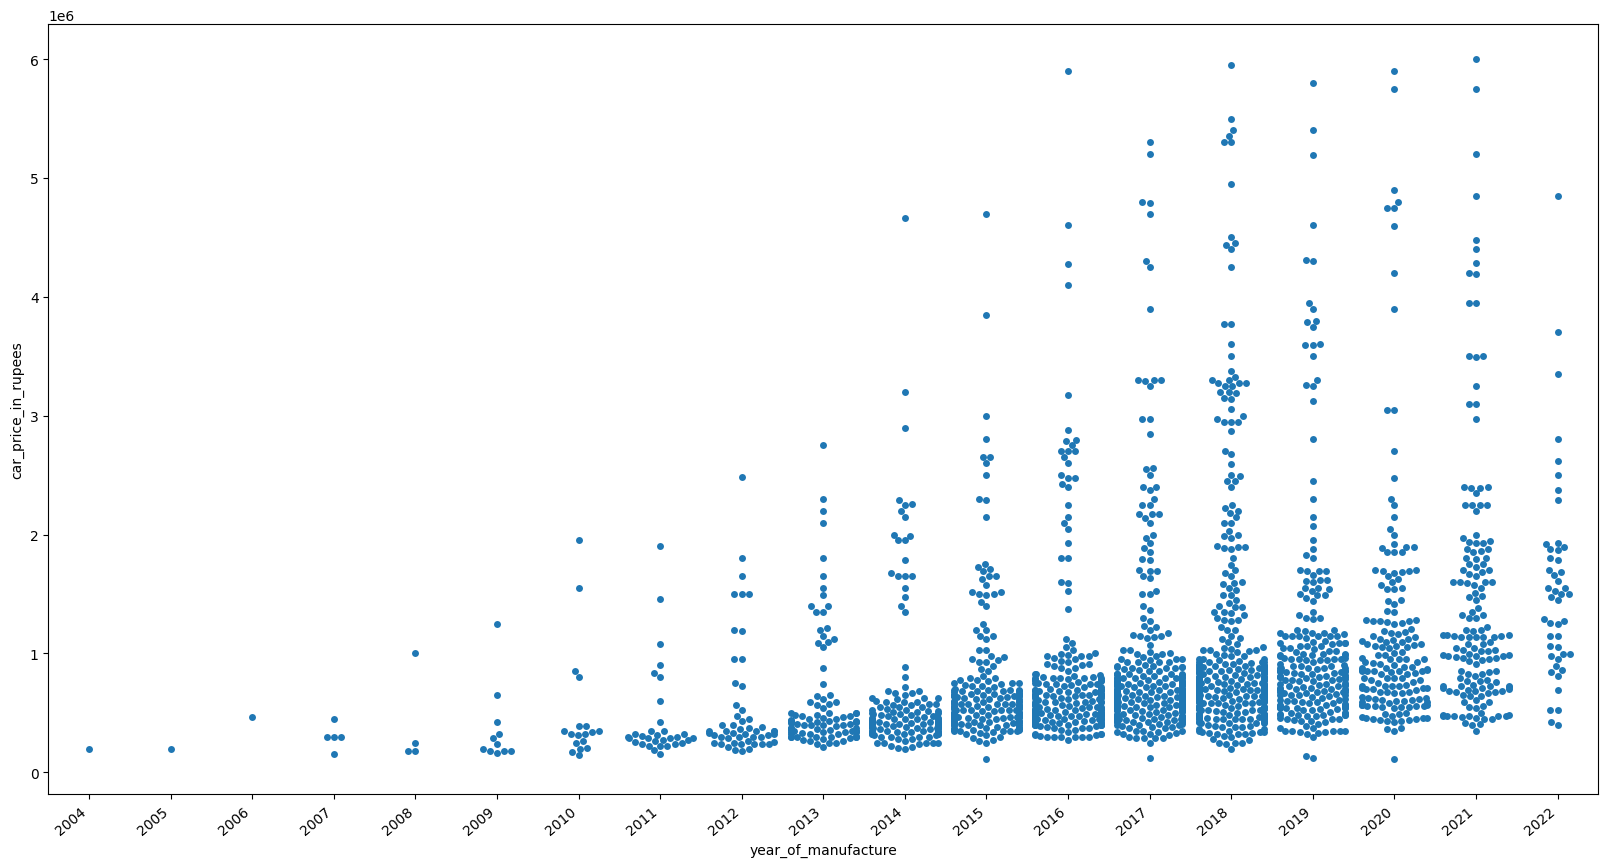

In [1300]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year_of_manufacture',y='car_price_in_rupees',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

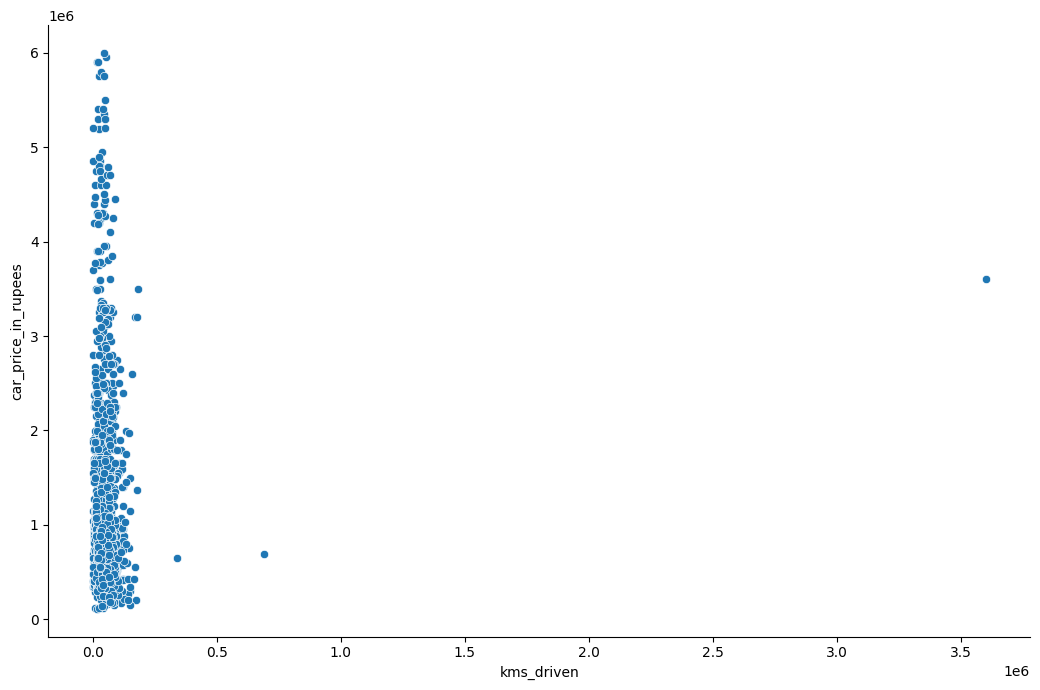

In [1301]:
sns.relplot(x='kms_driven',y='car_price_in_rupees',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='car_price_in_rupees'>

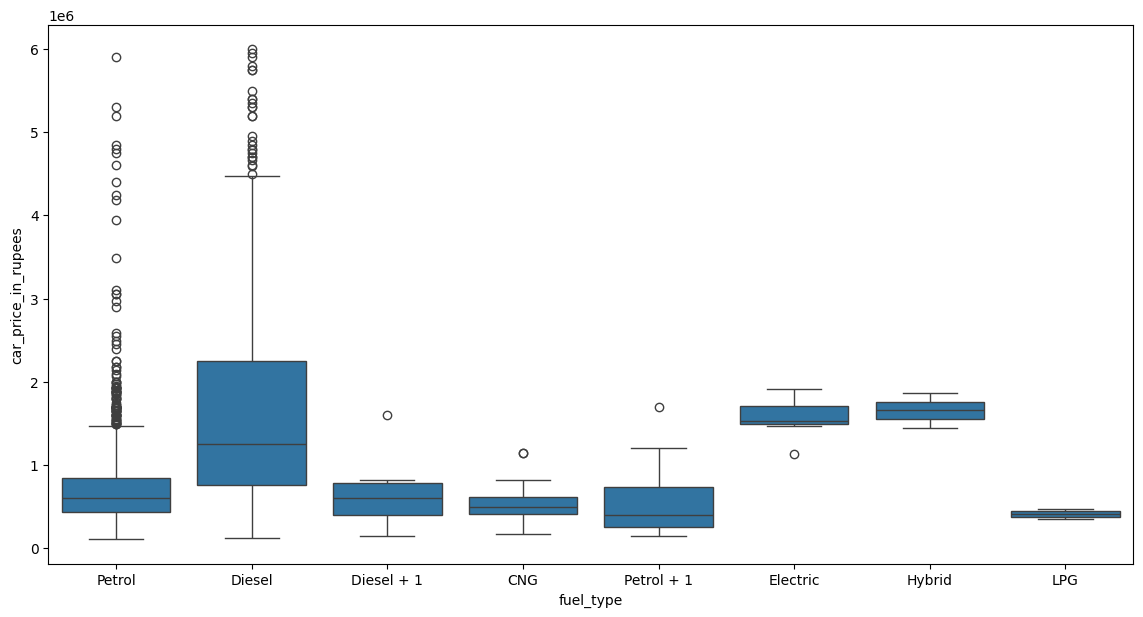

In [1302]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='car_price_in_rupees',data=car)

In [1303]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2012
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             1981 non-null   object 
 1   car_price_in_rupees  1981 non-null   float64
 2   kms_driven           1981 non-null   int64  
 3   fuel_type            1981 non-null   object 
 4   city                 1981 non-null   object 
 5   year_of_manufacture  1981 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 172.9+ KB


### Splitting the data set

In [1304]:
x=car[['car_name','year_of_manufacture','kms_driven', 'city','fuel_type']]
y=car['car_price_in_rupees']

In [1305]:
x

,car_name,year_of_manufacture,kms_driven,city,fuel_type
0,Hyundai,2016,22402,Mumbai,Petrol
1,Maruti,2019,10344,Kolkata,Petrol
2,Tata,2021,12999,Bangalore,Diesel
3,Maruti,2016,45000,Thane,Petrol
4,Jeep,2019,11193,Kolkata,Petrol
...,...,...,...,...,...
2008,Ford,2015,42158,Kolkata,Diesel
2009,MINI,2013,68862,Hyderabad,Diesel
2010,Hyundai,2018,37622,Chennai,Petrol
2011,Maruti,2017,64726,Mumbai,Petrol


In [1306]:
y

0        445000.0
1        293000.0
2       2249000.0
3        695000.0
4       1200000.0
          ...    
2008     360000.0
2009    2200000.0
2010     838000.0
2011     675000.0
2012     876000.0
Name: car_price_in_rupees, Length: 1981, dtype: float64

### **Model building**

In [1307]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [1308]:
from sklearn.linear_model import LinearRegression

In [1309]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [1310]:
ohe=OneHotEncoder()
ohe.fit(x[['car_name','city','fuel_type']])

OneHotEncoder()

In [1311]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['car_name','city','fuel_type']),
                                    remainder='passthrough')

In [1312]:
lr=LinearRegression()

In [1313]:
pipe=make_pipeline(column_trans,lr)

In [1314]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford',
       'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG',
       'MINI', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Tata', 'T...
                                                                            array(['Ahmedabad', 'Ambattur', 'Bangalore', 'Chennai', 'Delhi',
       'Faridabad', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Mumbai', 'Noida',
       'Pallikarnai', 'Poonamallee', 'Pune', 'Thane', 'Thiruvallur'],
      dtype=object),
                                                                            array(['CNG', 'Diesel', 'Diesel + 1', 'Electric', 'Hybrid', 'LPG',
       'Petrol', 'Petrol + 1'], dtype=object)]),
                                                  ['car_name', 'city',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [1315]:
y_pred=pipe.predict(x_test)

In [1316]:
r2_score(y_test,y_pred)

0.3647463162120892

In [1317]:
scores=[]
for i in range(500):
    X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [1318]:
np.argmax(scores)

327

In [1319]:
scores[np.argmax(scores)]

0.6491540126672095

In [1320]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.6491540126672095

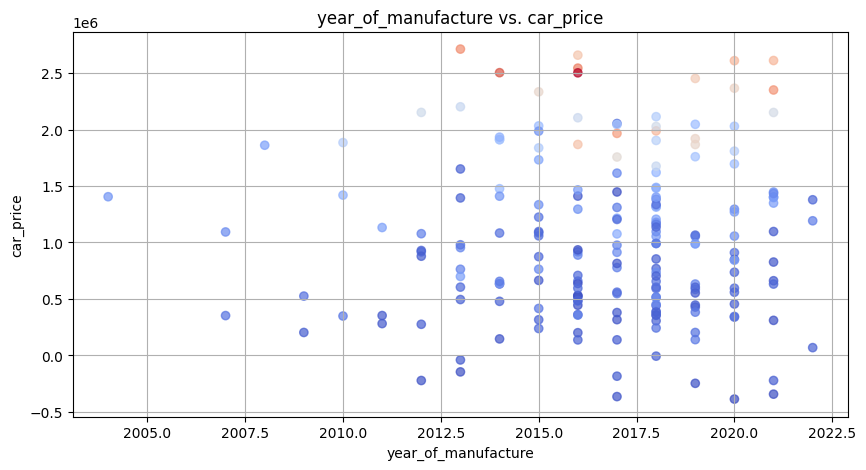

In [1321]:
# Scatter plot for age vs. predicted heart disease risk
plt.figure(figsize=(10, 5))
plt.scatter(x_test['year_of_manufacture'], y_pred, c=y_test, cmap='coolwarm', alpha=0.7)
plt.xlabel('year_of_manufacture')
plt.ylabel('car_price')
plt.title('year_of_manufacture vs. car_price')
plt.grid(True)
plt.show()

In [1321]:
#The scatter plot illustrates the relationship between the year of manufacture and car prices.
# As the year of manufacture increases, car prices tend to decrease.
# the prediction model is ready for the prediction of  used car price with 64% accuracy.